My Amazon Data Analysis in Python Project

I began by importing pandas needed for this project.

In [1]:
import pandas as pd

After I had received my data from Amazon, I cleaned the file for confidential data and columns that aren't required for the analysis. Now, I uploaded this data into a dataframe.

In [2]:
df= pd.read_csv('C:\\Users\\m_sha\\Downloads\\Amazon_order_history.csv')

Next, a sample of the data in the file along with it's full size.

In [3]:
df.head()

,Order ID,Order Date,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,Shipment Item Subtotal,Shipment Item Subtotal Tax
0,1,09/25/2022,19.98,2.60,12.48,0.0,35.06,19.98,2.60
1,2,09/19/2022,21.99,2.47,0.00,3.0,21.46,47.95,5.85
2,3,09/19/2022,16.99,2.21,0.00,0.0,19.20,47.95,5.85
3,4,09/19/2022,22.28,0.00,0.00,0.0,22.28,22.28,0.00
4,5,09/19/2022,8.97,1.17,0.00,0.0,10.14,47.95,5.85


In [4]:
df.shape

(279, 9)

The main purpose of this project is for me to figure out how much money I have spent on Amazon,ever.

In [5]:
df["Total Owed"].sum()

7752.31

The total money I've spent on Amazon is $7,752.31 CAD. Next, I wanted to know how much have I paid on average for an order.

In [6]:
df["Total Owed"].mean()

27.78605734767019

The average amount I have paid for an order on Amazon is about $28 CAD. I also wanted to check the median of my data. 

In [7]:
df["Total Owed"].median()

19.3

Since, my median is lower than my mean, I can infer that I have made a couple of expensive orders. Next, my highest-priced order.

In [8]:
df["Total Owed"].max()

293.79

In a similiar manner, I was also interested in my lowest-priced order.

In [9]:
df["Total Owed"].min()

1.91

My cheapest order was only $2 CAD! I was also interested in how much I have paid in taxes.

In [10]:
df["Shipment Item Subtotal Tax"].sum()

860.03

I have spent about $860.03 CAD on taxes. I also calculated my overall tax rate.

In [11]:
df["Shipment Item Subtotal Tax"].sum()/df["Total Owed"].sum()

0.11093854605917461

I paid an overall tax rate of about 11%. Next, I wanted to analyze my spending over time. In order to do this, I converted the dates into datatime data type.

In [12]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df.head()

,Order ID,Order Date,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,Shipment Item Subtotal,Shipment Item Subtotal Tax
0,1,2022-09-25,19.98,2.60,12.48,0.0,35.06,19.98,2.60
1,2,2022-09-19,21.99,2.47,0.00,3.0,21.46,47.95,5.85
2,3,2022-09-19,16.99,2.21,0.00,0.0,19.20,47.95,5.85
3,4,2022-09-19,22.28,0.00,0.00,0.0,22.28,22.28,0.00
4,5,2022-09-19,8.97,1.17,0.00,0.0,10.14,47.95,5.85


Next, I plotted my dataframe as is. 

In [13]:
df.plot.bar(x='Order Date', y='Total Owed', rot=90, figsize=(300,150),color='blue')

<AxesSubplot:xlabel='Order Date'>

As this bar graph is hard to analyze, I decided to group multiple orders on a single day together and create a chart organized by daily orders.

In [14]:
daily_orders = df.groupby('Order Date').sum()["Total Owed"]
daily_orders.head()

Order Date
2017-01-11     51.91
2017-09-14    108.19
2017-11-27     17.01
2018-03-16     15.88
2018-03-28      3.54
Name: Total Owed, dtype: float64

<AxesSubplot:xlabel='Order Date'>

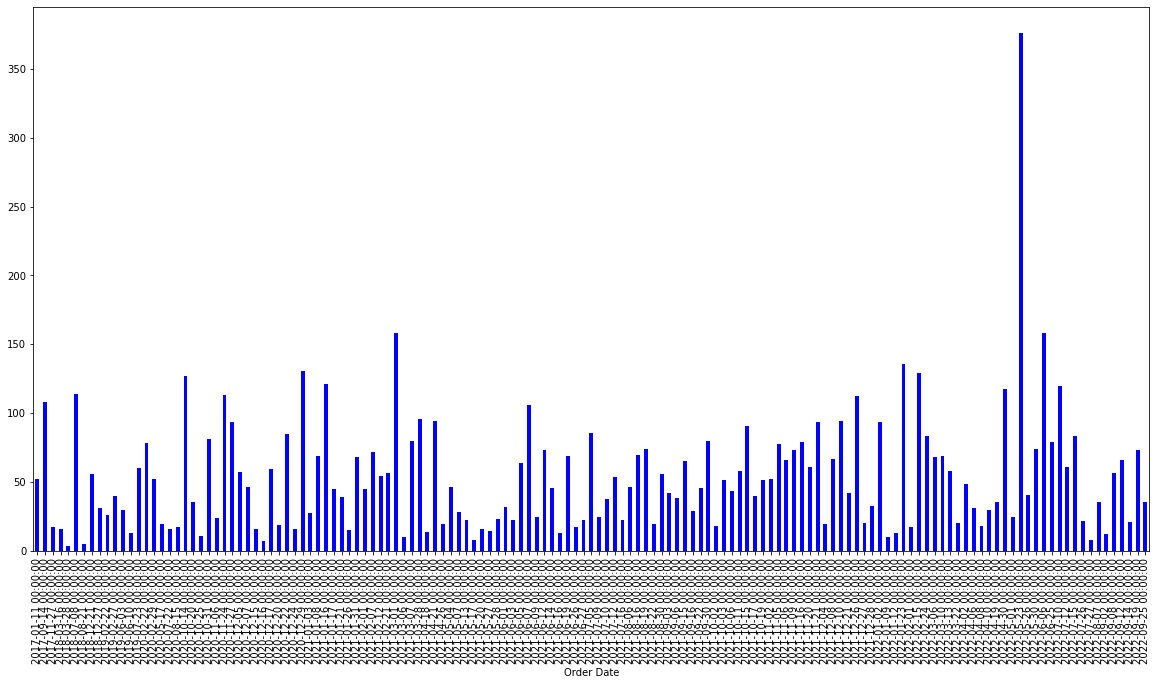

In [15]:
daily_orders.plot.bar(figsize=(20, 10), color='blue')

From this chart, I was able to conclude that my highest spending day was 23/05/2022. I was also curious to see in which month I spent the most money on Amazon. 

In [16]:
df['month'] = pd.DatetimeIndex(df['Order Date']).month
print(df['month'])

0      9
1      9
2      9
3      9
4      9
      ..
274    9
275    1
276    1
277    1
278    1
Name: month, Length: 279, dtype: int64


In [17]:
monthly_orders = df.groupby(df['month']).sum()["Total Owed"]
monthly_orders.head()

month
1    688.93
2    652.01
3    576.57
4    408.11
5    693.31
Name: Total Owed, dtype: float64

<AxesSubplot:xlabel='month'>

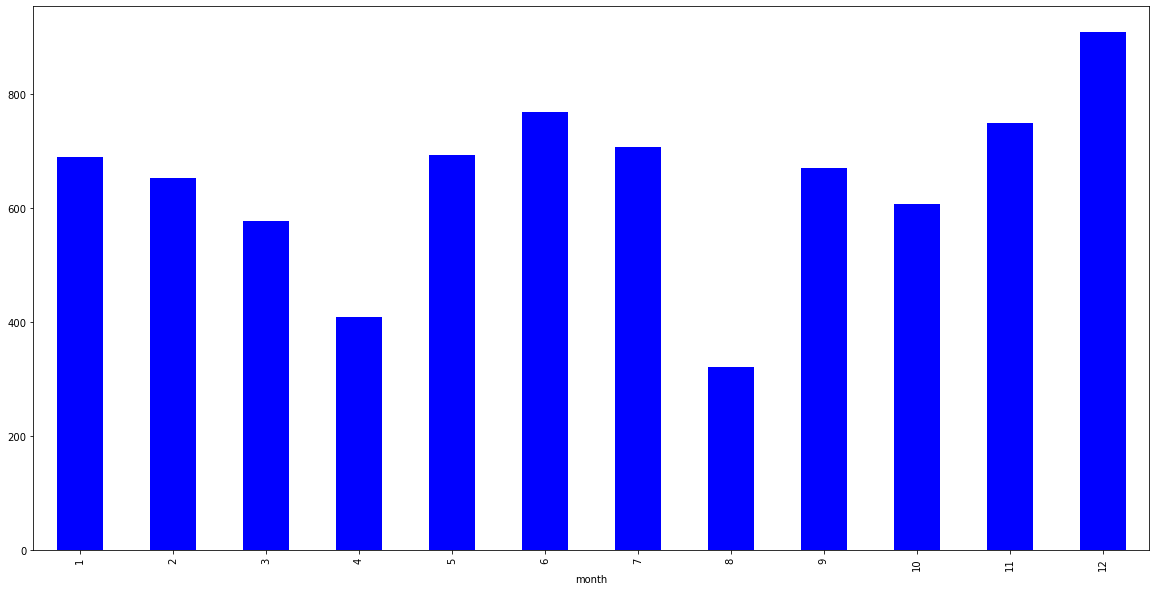

In [18]:
monthly_orders.plot.bar(figsize=(20, 10), color='blue')

Month of december is my highest-spending month out of the year. Lastly, my highest-spending year.

In [19]:
df['year'] = pd.DatetimeIndex(df['Order Date']).year
print(df['year'])

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
274    2017
275    2017
276    2017
277    2017
278    2017
Name: year, Length: 279, dtype: int64


In [20]:
yearly_orders = df.groupby(df['year']).sum()["Total Owed"]
yearly_orders.head()

year
2017     177.11
2018     224.56
2019     167.94
2020    1103.50
2021    3758.41
Name: Total Owed, dtype: float64

<AxesSubplot:xlabel='year'>

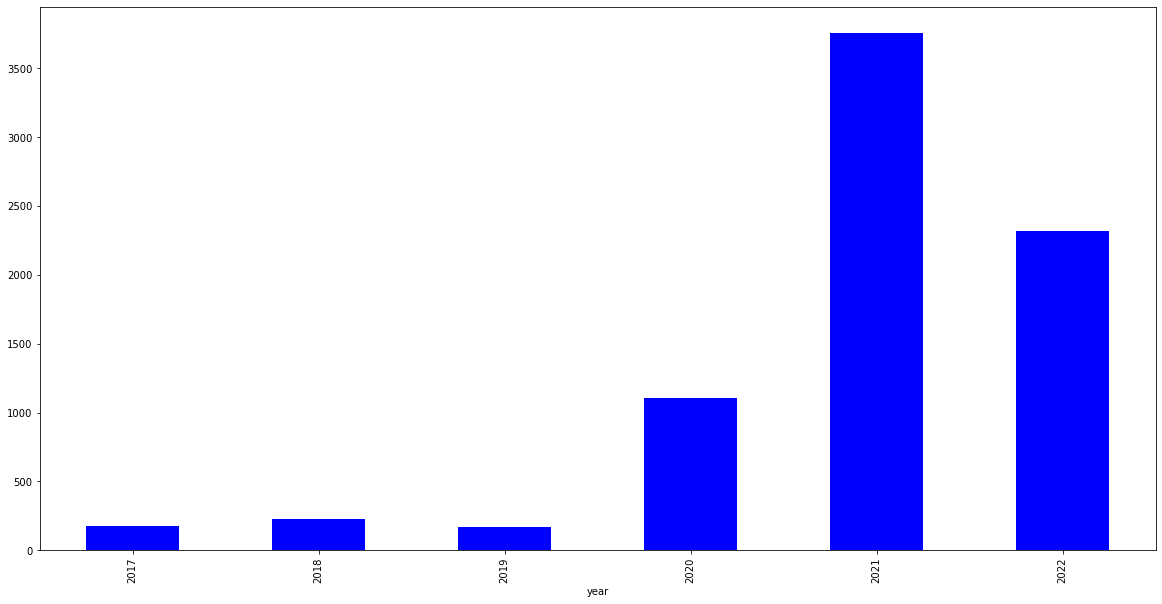

In [21]:
yearly_orders.plot.bar(figsize=(20, 10), color='blue')

2021 was year I spent the most money on Amazon. A great project to get started with datasets and pandas!